In [1]:
import os
import glob
import json
import h5py
import optparse
import sys
import traceback
import copy
import re
import pprint
pp = pprint.PrettyPrinter(indent=4)

import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
import scipy.stats as spstats
import statsmodels as sm
import cPickle as pkl
import tifffile as tf

import numpy as np
from scipy.optimize import leastsq
import pylab as pl


from pipeline.python import utils as putils
from pipeline.python.classifications import aggregate_data_stats as aggr
from pipeline.python.classifications import experiment_classes as util

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/traces/get_traces.py:96: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  Fi

In [2]:
%matplotlib notebook

In [3]:
rootdir = '/n/coxfs01/2p-data'

#### Set trace ID and FOV/state type
traceid = 'traces001'
fov_type = 'zoom2p0x'
state = 'awake'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'

#### Get all data sets
sdata = aggr.get_aggregate_info(traceid=traceid, fov_type=fov_type, state=state)


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

In [5]:
fov_keys = aggr.get_sorted_fovs()

In [7]:
pp.pprint(fov_keys)

{   'JC076': {   'Li': [('20190422_fov1', '20190502_fov1')],
                 'Lm': ['20190423_fov1'],
                 'V1': [('20190420_fov1', '20190501_fov1')]},
    'JC078': {   'Lm': [   ('20190426', '20190504', '20190509'),
                           ('20190430', '20190513')]},
    'JC080': {   'Li': ['20190602_fov1'],
                 'Lm': [('20190506', '20190603'), '20190602_fov2']},
    'JC083': {   'Lm': [('20190508', '201905012', '20190517')],
                 'V1': [('20190507', '20190510', '2010511')]},
    'JC084': {   'Lm': ['20190525'], 'V1': ['20190522']},
    'JC085': {   'V1': ['20190622']},
    'JC089': {   'Li': ['20190522']},
    'JC090': {   'Li': ['20190605']},
    'JC091': {   'Li': [   ('20190602', '20190607'),
                           ('20190606', '20190614'),
                           ('20191007', '20191008')],
                 'Lm': ['20190627']},
    'JC092': {   'Li': ['20190527_fov2', '20190527_fov3', '20190528']},
    'JC097': {   'Lm': ['20190615_f

In [1]:
import os
import cv2

import numpy as np
import pylab as pl
import tifffile as tf
import cPickle as pkl

from pipeline.python.coregistration.align_fov import Animal, FOV, warp_im, orient_2p_to_macro, scale_2p_fov, transform_2p_fov
from pipeline.python.rois import utils as roi_utils
from pipeline.python import utils as putils

import numpy.ma as ma
import matplotlib.gridspec as gridspec


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/rois/utils.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/hom

In [2]:
%matplotlib notebook

In [3]:
def adjust_image_contrast(img, clip=2.0, tile=5):
    '''Adjust grayscale fov image to make cells more visiible
    '''
    img_int8 = img.astype(np.uint8)
    clh = cv2.createCLAHE(clipLimit=clip, tileGridSize=(tile,tile))
    img_eq = clh.apply(img_int8)
    return img_eq

def plot_roi_overlay(roi_img, roi_zproj, ax=None, cmap='jet', vmin=None, vmax=None):
    '''Combine one image with another as overlay
    '''
    
    if vmin is None or vmax is None:
        vmin, vmax = (roi_img.min(), roi_img.max())
        
    roi_img_overlay = np.ma.masked_where(roi_img == 0, roi_img)
    
    if ax is None:
        fig, ax = pl.subplots()
        
    ax.imshow(roi_zproj, cmap='gray')
    ax.imshow(roi_img_overlay, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.axis('off')
    
    return 

def transform_2p_fov(img, pixel_size, zoom_factor=1.):
    '''
    '''
    transf_ = orient_2p_to_macro(img, zoom_factor=zoom_factor, save=False)
    scaled_ = scale_2p_fov(transf_, pixel_size=pixel_size)
    return scaled_

## Set output dir

In [4]:
#outdir = os.path.join(aggregate_dir, 'quality-checks', 'area-assignment')
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
outdir = os.path.join(aggregate_dir, 'data-stats', 'area-assignment', 'retinotopic-mapper')
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/area-assignment/retinotopic-mapper


## Load coregistration results (2p fovs aligned to widefield)

In [5]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC113'
session = '20191018'


# Load coregistration results for animal
# --------------------------------------------------
coreg_dfile = os.path.join(rootdir, animalid, 'coreg', 'FOVs.pkl')
with open(coreg_dfile, 'rb') as f:
    A = pkl.load(f)
     
vasculature = A.reference.copy()  # surface img for WF retino map (+ 2p fov alignment)
print("Found %i fovs." % len(A.session_list.keys()))


# Get specificied 2p FOV (unaligned + aligned)
# --------------------------------------------------
for f in A.session_list.keys():
    print(f)
fov_key = [f for f in A.session_list.keys() if session in f][0]
fov_name = fov_key.split('%s_' % session)[-1]
fov_ = A.session_list[fov_key]


coreg_fov2p_transformed = fov_.image.copy() # transformed + pixel-scaled image (pre-alignment)
coreg_fov2p_warped = fov_.alignment['aligned'] # aligned 2p fov 


Found 5 fovs.
20191017_FOV1_zoom2p0x
20191012_FOV3_zoom2p0x
20191018_FOV1_zoom2p0x
20191012_FOV2_zoom2p0x
20191012_FOV1_zoom2p0x


<IPython.core.display.Javascript object>


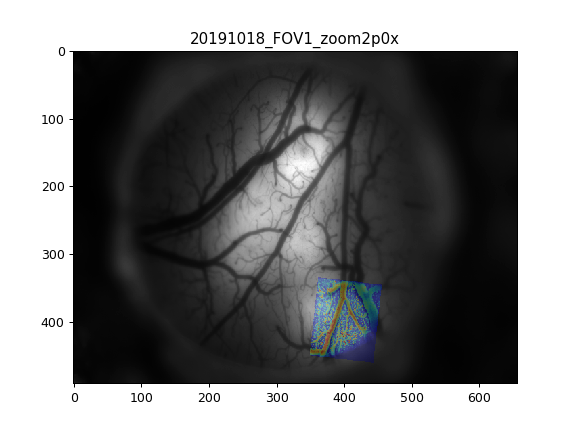

In [8]:

pl.figure()
fov2p_aligned_overlay = np.ma.masked_where(coreg_fov2p_warped == 0, coreg_fov2p_warped)
pl.imshow(vasculature, cmap='gray')
pl.imshow( fov2p_aligned_overlay, cmap='jet', alpha=0.3)

pl.title(fov_key)

pl.savefig(os.path.join(outdir, '%s_%s_%s_coregistration.png' % (session, animalid, fov_name)))


In [19]:
dir(fov_)

['__doc__',
 '__init__',
 '__module__',
 'acquisition',
 'alignment',
 'animalid',
 'coreg_dir',
 'get_transformed_image',
 'image',
 'image_fpath',
 'image_path',
 'meta',
 'pixel_size',
 'rootdir',
 'scale_anatomicals',
 'session',
 'transform_anatomicals']

## Warp 2p ROIs using transf matrix

In [9]:
def assign_int_to_masks(roi_masks):
    d1, d2, nrois = roi_masks.shape

    int_rois = np.dstack([roi_masks[:, :, r].astype(bool).astype(int)*(r+1) for r in np.arange(0, nrois)])
    
    int_rois_sum = np.zeros((d1, d2))
    for ri in np.arange(0, nrois):
        curr_msk = int_rois[:, :, ri].copy()
        int_rois_sum[curr_msk>0] = ri+1
        
    #int_rois_sum = int_rois.sum(axis=-1)
    int_roi_overlay = int_rois_sum.copy().astype(float)
    int_roi_overlay[int_rois_sum==0] = np.nan
    #np.ma.masked_array(int_rois_sum==0, int_rois_sum)
    print(nrois, int_rois_sum.min(), int_rois_sum.max())
    
    return int_roi_overlay

In [10]:
#### Get roi masks 
traceid= 'traces001'
roi_id = None

if roi_id is None:
    roi_id = roi_utils.get_roiid_from_traceid(animalid, session, fov_name, traceid=traceid)
roi_masks, roi_zproj = roi_utils.load_roi_masks(animalid, session, fov_name, rois=roi_id)
print("Loaded rois: %s" % roi_id)
print(roi_masks.shape)

data_id = '%s_%s_%s_%s_%s' % (fov_.session, fov_.animalid, fov_name, roi_id, traceid)
print(data_id)


Loaded rois: rois001
(512, 512, 210)
20191018_JC113_FOV1_zoom2p0x_rois001_traces001


In [12]:
#### Format input images (zprojection image + roi masks)
roi_zproj_eq = adjust_image_contrast(roi_zproj, clip=10.0, tile=5)
#roi_summed = np.sum(roi_masks, axis=-1)

#### Transform roi image to match widefield orientation
transf_zproj = transform_2p_fov(roi_zproj_eq, fov_.pixel_size)
#transf_summed_rois = transform_2p_fov(roi_summed, fov_.pixel_size)

#### Apply BV warp from coregistration to ROI images
transform_mat = fov_.alignment['transform_matrix'].copy()
warped_zproj = warp_im(transf_zproj.astype(float), transform_mat, vasculature.shape)
#warped_summed_rois = warp_im(roi_summed_transf.astype(float), transform_mat, vasculature.shape)

#### Also apply warp to EACH roi
d1, d2, nrois = roi_masks.shape  
transf_rois = np.dstack([transform_2p_fov(roi_masks[:, :, i].astype(float), fov_.pixel_size) \
               for i in np.arange(0, nrois)])
warped_rois = np.dstack([warp_im(transf_rois[:, :, i], transform_mat, vasculature.shape) \
               for i in np.arange(0, nrois)])
    

In [13]:
#### Create arrays for visualization

# assign unique roi id to original roi masks
rois_orig_overlay = assign_int_to_masks(roi_masks.astype(bool).astype(int))

# assign unique roi id to mask for transformed 2p fov
rois_transf_overlay = assign_int_to_masks(transf_rois.astype(bool).astype(int))

# assign unique roi id to WF-warped roi image
rois_warped_overlay = assign_int_to_masks(warped_rois.astype(bool).astype(int))


(210, 0.0, 210.0)
(210, 0.0, 210.0)
(210, 0.0, 210.0)


## Plot all the steps

<IPython.core.display.Javascript object>


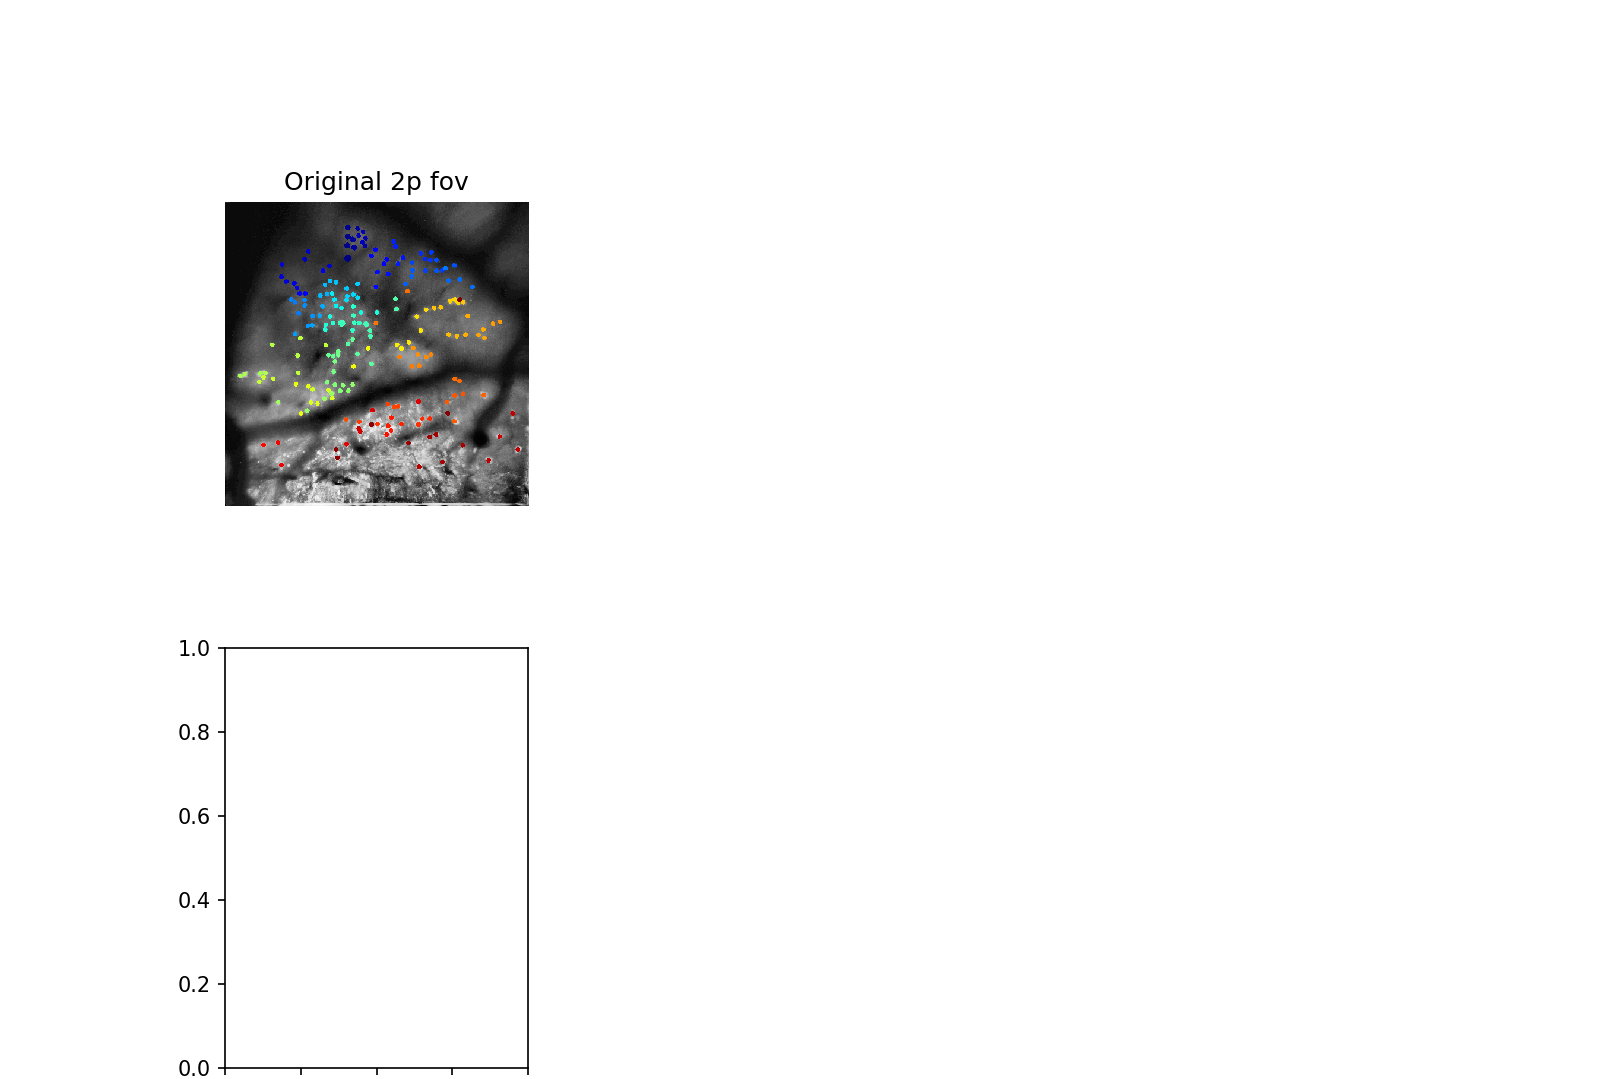

NameError: name 'roi_zproj_transf' is not defined

In [14]:
#fig = pl.figure(figsize=(10,20), dpi=150) #constrained_layout=True)
fig = pl.figure(figsize=(12, 8), dpi=150)
gs = gridspec.GridSpec(ncols=4, nrows=2) #, figure=fig)

ax = fig.add_subplot(gs[0, 0])
plot_roi_overlay(rois_orig_overlay, roi_zproj_eq, ax=ax,vmin=0, vmax=nrois)
ax.set_title('Original 2p fov')

ax = fig.add_subplot(gs[1, 0])
plot_roi_overlay(rois_transf_overlay, roi_zproj_transf, ax=ax, vmin=0, vmax=nrois)
ax.set_title('Warped to WF')


ax = fig.add_subplot(gs[0:, 1:])
ax.imshow(vasculature, cmap='gray')
ax.imshow( fov2p_aligned_overlay, cmap='Greens', alpha=0.2)
ax.imshow( rois_warped_overlay, cmap='jet', alpha=1.0,  vmin=0, vmax=nrois)
ax.axis('off')
ax.set_title('2p/WF overlay')

putils.label_figure(fig, data_id)
pl.subplots_adjust(left=0.01, right=0.99, hspace=0.2)
pl.savefig(os.path.join(outdir, '%s.png' % data_id))
print(outdir, data_id)

In [16]:
dir(fov_)

['__doc__',
 '__init__',
 '__module__',
 'acquisition',
 'alignment',
 'animalid',
 'coreg_dir',
 'get_transformed_image',
 'image',
 'image_fpath',
 'image_path',
 'meta',
 'pixel_size',
 'rootdir',
 'scale_anatomicals',
 'session',
 'transform_anatomicals']

In [15]:

#### Save
coreg_dir = os.path.split(coreg_dfile)[0]
alignment_outfile = os.path.join(coreg_dir, 'alignment_results.pkl')

'''
Saves:
    fov2p_transformed : 2p fov rotated, flipped, and pixel-scaled.
    fov2p_warped : 2p fov warped to align to widefield vasculature image with warp_mat.
    warp_mat : Transformation matrix to align 2p to widefield (wrap_im()).
    vasculature : Surface image (common to retino + 2p fov coreg.)
    
    
'''

class struct():
    pass
coreg_d = {'BV_transformed': coreg_fov2p_transformed,
           'BV_warped': coreg_fov2p_warped,
           'warp_mat': transform_mat,
           'vasculature': vasculature,
           'pixel_size': fov_.pixel_size}


# coreg_d = struct()
# coreg_d.transformed = coreg_fov2p_transformed
# coreg_d.warped = coreg_fov2p_warped

zproj_d = struct() #
zproj_d.original = roi_zproj
zproj_d.transformed = transf_zproj
zproj_d.warped = warped_zproj

rois_d = struct()
rois_d.original = roi_masks
rois_d.transformed = transf_rois
rois_d.warped = warped_rois


D = {'coreg': coreg_d,
    'zproj': zproj_d,
    'rois': rois_d}

with open(alignment_outfile, 'wb') as f:
    pkl.dump(D, f, protocol=pkl.HIGHEST_PROTOCOL)
    
    
# # outf = h5py.File(alignment_outfile, 'a')
# try:
#     #if fkey in outf.keys():
#     f = outf[fkey] if fkey in outf.keys() else outf.create_group(fkey)
#     #f = outf.create_group(fkey)

#     grp = f.create_dataset('coreg/fov2p_transformed', coreg_fov2p_transformed.shape, dtype=coreg_fov2p_transformed.dtype)
#     grp[...] = coreg_fov2p_transformed
#     grp = f.create_dataset('coreg/fov2p_warped', coreg_fov2p_warped.shape, dtype=coreg_fov2p_warped.dtype)
#     grp[...] = coreg_fov2p_warped
#     grp = f.create_dataset('coreg/warp_mat', transform_mat.shape, dtype=transform_mat.dtype)
#     grp[...] = transform_mat
#     grp = f.create_dataset('coreg/vasculature', vasculature.shape, dtype=vasculature.dtype)
#     grp[...] = vasculature
#     grp.attrs['fov2p_transformed'] = '2p fov rotated, flipped, and pixel-scaled'
#     grp.attrs['fov2p_warped'] = '2p fov warped to align to widefield vasculature image with warp_mat'
#     grp.attrs['warp_mat'] = 'Transformation matrix to align 2p to widefield (wrap_im())'
#     grp.attrs['source'] = coreg_dfile
#     grp.attrs['pixel_size'] = fov_.pixel_size


#     grp = f.create_dataset('zproj/image', roi_zproj.shape, dtype=roi_zproj.dtype)
#     grp[...] = roi_zproj
#     grp = f.create_dataset('zproj/transformed', roi_zproj_transf.shape, dtype=roi_zproj_transf.dtype)
#     grp[...] = roi_zproj_transf
#     grp = f.create_dataset('zproj/warped', roi_zproj_warped.shape, dtype=roi_zproj_warped.dtype)
#     grp[...] = roi_zproj_warped


#     grp = f.create_dataset('rois/masks', roi_masks.shape, dtype=roi_masks.dtype)
#     grp[...] = roi_masks
#     grp = f.create_dataset('rois/transformed', transf_rois.shape, dtype=transf_rois.dtype)
#     grp[...] = transf_rois
#     grp = f.create_dataset('rois/warped', warped_rois.shape, dtype=warped_rois.dtype)
#     grp[...] = warped_rois

#     grp.attrs['roiid'] = roi_id
#     grp.attrs['traceid'] = traceid
# except Exception as e:
#     traceback.print_exc()
# finally:
#     outf.close()


# np.savez(alignment_outfile, 
#          'coreg_transformed': fov2p_transformed,
#          'coreg_aligned': fov2p_to_widefield,
         
#          'roi_zproj': roi_zproj,
#          'roi_summed': roi_img,
#          'roi_masks': roi_masks,
         
#          'transform_mat': transform_mat,
         
#          )

In [ ]:
print(alignment_outfile)

#### Load area boundaries

In [222]:

borders_dfile = glob.glob(os.path.join(aggregate_dir, 'widefield-maps', 'signmaps',
                      'retinotopic-mapper', '%s_*' % animalid, '*%s_results.pkl' % animalid))[0]
with open(borders_dfile, 'rb') as f:
    retino = pkl.load(f)

ImportError: No module named retinotopic_mapping.RetinotopicMapping

In [89]:
# load anatomical (transformed)

def load_anatomical(animalid, session, fov, fmt='tif', channel_id=2, rootdir='/n/coxfs01/2p-data'):

    anat_fpath = glob.glob(os.path.join(rootdir, animalid, session, fov, 'anatomical', \
                                        'anatomical_Channel%02d*scaled.%s' % (channel_id, fmt)))[0]
    
    if fmt=='tif':
        img = tf.imread(anat_fpath)
    else:
        img = cv2.imread(anat_fpath)
        
    if len(img.shape)>2:
        img = img[:, :, 0]
    
    return img

<IPython.core.display.Javascript object>


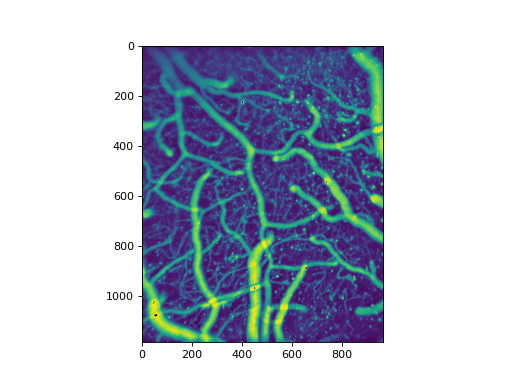

In [91]:
zimg = load_anatomical(animalid, session, fov, fmt=fmt)
pl.figure()
pl.imshow(zimg)

In [74]:
xaxis_conversion = 2.31 #2.312 # goes with A-P axis
yaxis_conversion = 1.89  #1.904 # goes with M-L axis

d1, d2 = img.shape # (im_h, im_w)
new_d1 = int(round(d1*xaxis_conversion, 1)) # after transform, 
new_d2 = int(round(d2*yaxis_conversion, 1)) # after transform, d2~ML axis (width), 
zimg_r = cv2.resize(im, (new_d2, new_d1))   # (new_d1~COLS, new_d2~ROWS)
print(zimg_r.shape)
print(new_d1, new_d2)

In [83]:
img.size

262144

<IPython.core.display.Javascript object>


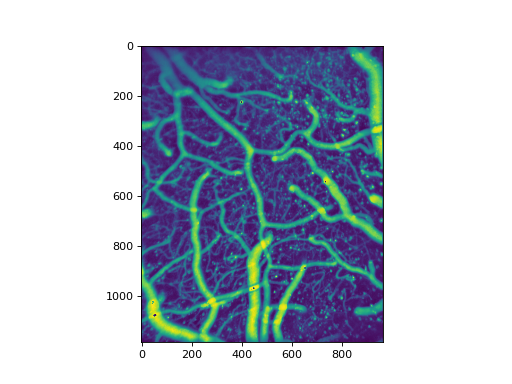

In [84]:
pl.figure()
pl.imshow(zimg_r)

In [60]:
img_outpath = '%s_scaled2.%s' % (os.path.splitext(anat_fpath)[0], fmt)

if fmt=='tif':
    tf.imsave(img_outpath, zimg_r)
else:
    cv2.imwrite(img_outpath, zimg_r)



True

In [ ]:
('saved results: ', '/n/coxfs01/julianarhee/aggregate-visual-areas/widefield-maps/signmaps/retinotopic-mapper/JC076_20190404/20190404_MJC076_results.pkl')